## HW03 – Principal Component Analysis Homes in Ames, IA

### By: Donovan Manogue

## 3. Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

pd.set_option('display.max_columns',None)

In [5]:
# Importing the libraries we need at the beginning. We will add more as we go and more are needed.

## 4. Import Data from a URL

In [7]:
df_realestate = pd.read_csv('Homework3_Data/DATA6310_HW03.csv', index_col =0, header =0)

In [8]:
# Importing our data needed from the homework from my local pc not the URL. Same as the last homeworks

## 5. Create DataFrames

### Section 5a: Create df_re and standardize df_re_sc

In [11]:
df_re = df_realestate.select_dtypes(exclude=['object'])

In [12]:
df_realestate.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1387 entries, 0 to 1386
Data columns (total 111 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Dwelling Type                  1387 non-null   object 
 1    Lot Frontage                   1387 non-null   int64  
 2    Lot Area                       1387 non-null   int64  
 3    Land Contour                   1387 non-null   object 
 4    Neighborhood                   1387 non-null   object 
 5    Location Condition             1387 non-null   object 
 6    Overall Quality                1387 non-null   int64  
 7    Overall Cond                   1387 non-null   int64  
 8    Year Built                     1387 non-null   int64  
 9    Masonry/Veneer Area            1387 non-null   int64  
 10   Basement Finished Area         1387 non-null   int64  
 11   Basement Unfinished Area       1387 non-null   int64  
 12   1st Floor Area                 1387 n

In [13]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

df_re_sc = scaler.fit_transform(df_re)
df_re_sc = pd.DataFrame(df_re_sc)
df_re_sc.columns = df_re.columns

df_re_sc.head()

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num,School_Index,Comprehensive_Decision,Targeted_Decision,Growth,Percent Proficient,Percent_Male,Percent_Female,Percent_EL,Percent_FRL,Percent_IEP,Percent_Asian,Percent_Black,Percent_PacIs,Percent_Hispanic,Percent_Multi,Percent_NatAm,Percent_White,Percent_Foster_Care,Percent_Military_Connected,Percent_Migrant,Percent_Homeless,sch_Edwards,sch_Fellows,sch_Gilbert,sch_Meeker,sch_Mitchell,sch_Sawyer
0,0.219930,-0.204463,0.658699,-0.534526,1.039082,0.542858,0.622973,-0.951251,-0.835849,1.179651,0.420935,0.145192,0.945951,-0.970930,0.308672,0.387376,-0.788200,1.397862,1.005337,1.676679,-0.060149,-0.207485,0.697976,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,1.944932,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,-0.304937,-0.120957,-0.565416,1.522558,-0.835269,0.740597,-1.082166,-0.324314,0.575408,-1.076244,-1.173534,-1.819479,1.819479,0.069743,0.765189,1.456234,-0.366603,1.363077,1.469508,0.229835,0.648083,-0.587866,-0.431434,0.131415,-0.433013,0.0,1.275408,1.85238,-0.689588,-0.433013,-0.348226,-0.316102,-0.324314
1,0.308093,0.077510,0.658699,-0.534526,0.971864,0.347092,0.104752,-0.308972,-0.660916,1.207615,0.580558,0.145192,-0.339097,0.591344,0.308672,0.598238,-0.910802,1.397862,1.005337,1.676679,-0.060149,-0.207485,0.697976,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,1.944932,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,-0.304937,-0.120957,-0.565416,1.522558,-0.835269,0.740597,-1.082166,-0.324314,0.575408,-1.076244,-1.173534,-1.819479,1.819479,0.069743,0.765189,1.456234,-0.366603,1.363077,1.469508,0.229835,0.648083,-0.587866,-0.431434,0.131415,-0.433013,0.0,1.275408,1.85238,-0.689588,-0.433013,-0.348226,-0.316102,-0.324314
2,0.984007,0.017288,0.658699,-0.534526,1.139908,1.176217,-1.040047,2.088266,0.908011,-0.810454,-0.032731,0.145192,0.303427,0.591344,1.712368,1.385456,0.063565,0.006021,-0.810291,-0.286366,-0.060149,-0.207485,-0.197329,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,-0.514157,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.8

In [14]:
# in this section I made sure to standardize the df_re, and excluded any objects

### Section 5b: Create df_re_only and standardize df_re_only_sc

In [16]:
df_re_only = df_re.iloc[:, 0:75] 

In [17]:
df_re_only

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num
0,65,8450,7,5,2003,196,706,150,856,854,1710,3,8,0,2,208500,61,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
1,68,11250,7,5,2001,162,486,434,920,866,1786,3,6,1,2,223500,42,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
2,91,10652,7,5,2006,306,0,1494,1494,0,1494,3,7,1,3,279500,193,2,0,2.0,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3
3,75,9742,8,5,2002,281,0,1777,1795,0,1795,3,7,1,2,230000,330,2,0,2.0,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
4,85,11049,8,5,2007,0,0,1234,1234,0,1234,3,7,0,2,179900,30,2,0,2.0,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,51,9842,5,6,1921,0,0,612,990,1611,2601,4,8,0,2,189000,484,3,1,3.5,0,0,0.750000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2
1383,52,6292,6,5,1930,0,384,384,790,0,790,2,4,0,1,91000,141,1,0,1.0,0,0,0.500000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1384,51,6171,6,6,1925,0,264,712,1160,448,1608,3,7,1,1,137450,163,2,1,2.5,0,0,0.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3
1385,24,1950,6,6,1980,0,81,23,716,840,1556,3,6,1,2,151000,161,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2


In [18]:
df_school = df_re.iloc[:, 75:103]

In [19]:
scaler = preprocessing.StandardScaler()

df_re_only_sc = scaler.fit_transform(df_re_only)
df_re_only_sc = pd.DataFrame(df_re_only_sc)
df_re_only_sc.columns = df_re_only.columns

df_re_only_sc.head()

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num
0,0.219930,-0.204463,0.658699,-0.534526,1.039082,0.542858,0.622973,-0.951251,-0.835849,1.179651,0.420935,0.145192,0.945951,-0.970930,0.308672,0.387376,-0.788200,1.397862,1.005337,1.676679,-0.060149,-0.207485,0.697976,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,1.944932,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,-0.304937,-0.120957,-0.565416,1.522558,-0.835269,0.740597
1,0.308093,0.077510,0.658699,-0.534526,0.971864,0.347092,0.104752,-0.308972,-0.660916,1.207615,0.580558,0.145192,-0.339097,0.591344,0.308672,0.598238,-0.910802,1.397862,1.005337,1.676679,-0.060149,-0.207485,0.697976,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,1.944932,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,-0.304937,-0.120957,-0.565416,1.522558,-0.835269,0.740597
2,0.984007,0.017288,0.658699,-0.534526,1.139908,1.176217,-1.040047,2.088266,0.908011,-0.810454,-0.032731,0.145192,0.303427,0.591344,1.712368,1.385456,0.063565,0.006021,-0.810291,-0.286366,-0.060149,-0.207485,-0.197329,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,-0.514157,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,3.279365,-0.120957,-0.565416,1.522558,-0.835269,0.740597
3,0.513806,-0.074353,1.406339,-0.534526,1.005473,1.032272,-1.040047,2.728283,1.730741,-0.810454,0.599461,0.145192,0.303427,0.591344,0.308672,0.689612,0.947593,0.006021,-0.810291,-0.286366,-0.060149,-0.207485,-0.197329,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,-0.514157,-0.218135,-0.181004,-0.120957,-0.20702,-0.20702,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.1632

In [20]:
# In section 5b i did the same thing I did in secion 5a, but I excluded the df_school information and used iloc to get rid of that data.

## 6. PCA with df_re_sc and visualize

### Section 6a: Create a Principal Component Analysis for df_re_sc

In [23]:
df_re_sc

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num,School_Index,Comprehensive_Decision,Targeted_Decision,Growth,Percent Proficient,Percent_Male,Percent_Female,Percent_EL,Percent_FRL,Percent_IEP,Percent_Asian,Percent_Black,Percent_PacIs,Percent_Hispanic,Percent_Multi,Percent_NatAm,Percent_White,Percent_Foster_Care,Percent_Military_Connected,Percent_Migrant,Percent_Homeless,sch_Edwards,sch_Fellows,sch_Gilbert,sch_Meeker,sch_Mitchell,sch_Sawyer
0,0.219930,-0.204463,0.658699,-0.534526,1.039082,0.542858,0.622973,-0.951251,-0.835849,1.179651,0.420935,0.145192,0.945951,-0.970930,0.308672,0.387376,-0.788200,1.397862,1.005337,1.676679,-0.060149,-0.207485,0.697976,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,1.944932,-0.218135,-0.181004,-0.120957,-0.20702,-0.207020,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,-0.304937,-0.120957,-0.565416,1.522558,-0.835269,0.740597,-1.082166,-0.324314,0.575408,-1.076244,-1.173534,-1.819479,1.819479,0.069743,0.765189,1.456234,-0.366603,1.363077,1.469508,0.229835,0.648083,-0.587866,-0.431434,0.131415,-0.433013,0.0,1.275408,1.85238,-0.689588,-0.433013,-0.348226,-0.316102,-0.324314
1,0.308093,0.077510,0.658699,-0.534526,0.971864,0.347092,0.104752,-0.308972,-0.660916,1.207615,0.580558,0.145192,-0.339097,0.591344,0.308672,0.598238,-0.910802,1.397862,1.005337,1.676679,-0.060149,-0.207485,0.697976,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,1.944932,-0.218135,-0.181004,-0.120957,-0.20702,-0.207020,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,2.871701,-0.193383,-0.258695,-0.245759,-0.158522,-0.085218,-0.18521,-0.080816,-0.167836,-0.237402,-0.235702,-0.280247,-0.237402,-0.208906,-0.257105,-0.132696,-0.126954,-0.163239,-0.08941,-0.178869,-0.233993,-0.076166,-0.165552,-0.114666,-0.080816,-0.266538,-0.08941,-0.304937,-0.120957,-0.565416,1.522558,-0.835269,0.740597,-1.082166,-0.324314,0.575408,-1.076244,-1.173534,-1.819479,1.819479,0.069743,0.765189,1.456234,-0.366603,1.363077,1.469508,0.229835,0.648083,-0.587866,-0.431434,0.131415,-0.433013,0.0,1.275408,1.85238,-0.689588,-0.433013,-0.348226,-0.316102,-0.324314
2,0.984007,0.017288,0.658699,-0.534526,1.139908,1.176217,-1.040047,2.088266,0.908011,-0.810454,-0.032731,0.145192,0.303427,0.591344,1.712368,1.385456,0.063565,0.006021,-0.810291,-0.286366,-0.060149,-0.207485,-0.197329,-0.332398,-0.216316,-0.258695,-0.1409,-0.100978,-0.208906,-0.514157,-0.218135,-0.181004,-0.120957,-0.20702,-0.207020,-0.158522,-0.189335,-0.111395,-0.038001,-0.108029,-0.191368,-0.1409,

In [24]:
from sklearn.decomposition import PCA

n_pcs = 102
model = PCA(n_components=n_pcs)

df_re_pca = model.fit_transform(df_re_sc)

#Create a DataFrame of the projected data
df_re_pca = pd.DataFrame(df_re_pca)

names = []
for x in range(n_pcs):
    names.append('PC%d'%(x+1))

df_re_pca.columns = names

df_re_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102
0,-2.398948,4.639324,2.568548,-1.577758,-0.254402,-1.525552,1.132318,-0.987961,-1.074476,1.721369,-2.056441,0.530399,-0.403958,-0.733552,0.593550,0.510345,0.585624,-0.290879,-0.510415,-0.451932,-0.039828,-0.252472,-0.432934,-0.352144,0.143720,-0.977439,0.099522,0.429285,-0.312245,-0.005874,-0.254600,0.194732,0.335433,-0.606374,0.040944,0.560198,-0.100351,-0.198345,-0.425494,-0.603877,0.343769,0.245578,0.059163,-0.123216,0.417843,-0.548132,-0.249637,0.144961,0.120764,0.126698,0.468972,0.525233,-0.009852,0.257456,0.202881,0.130191,0.129552,0.281067,0.090247,0.159103,0.472041,0.111168,-0.384820,-0.131597,0.120661,0.147998,0.355617,-0.130766,0.309106,-0.086920,0.023512,-0.078261,-0.039319,-1.814335e-14,-1.940840e-15,-1.163879e-16,2.824391e-16,-1.844142e-15,-3.744828e-16,2.584444e-16,-4.049058e-17,7.710379e-16,-1.217725e-15,-2.200409e-16,2.960785e-16,-4.520855e-16,6.385295e-16,9.420159e-19,-8.202355e-16,1.534806e-15,-2.821196e-17,2.020097e-16,-2.264067e-16,-1.624891e-15,1.523667e-16,1.654616e-15,3.122015e-16,7.117299e-16,6.821059e-16,-2.853747e-16,-2.267977e-16,-1.165581e-16
1,-2.303315,4.701190,2.516171,-1.627789,-0.343726,-1.514224,0.925471,-0.979130,-1.086785,1.178809,-1.894144,0.479632,-0.338049,-0.429398,0.849764,0.315878,0.558393,-0.259585,-0.461502,-0.244561,0.088828,-0.032768,-0.478488,-0.430137,-0.137727,-0.851353,0.225771,0.583704,-0.240710,0.045593,-0.236522,0.392761,0.312348,-0.465911,-0.259544,0.302971,-0.243073,-0.195352,-0.252046,-0.308237,-0.017447,0.649295,-0.189129,-0.074274,0.354870,-0.592393,-0.061758,0.018129,-0.078054,0.291159,0.193503,0.229037,0.682834,-0.132370,0.678532,-0.315333,-0.128802,0.078961,0.584711,0.270023,-0.072669,-0.353400,-0.379830,-0.264978,-0.087830,0.093347,-0.526355,0.373327,-0.035306,0.000020,-0.059651,-0.122382,-0.044446,-1.010798e-14,-9.616819e-16,1.072153e-15,1.692908e-16,-8.310891e-16,-6.809743e-16,3.161288e-16,-1.023798e-15,-8.447897e-16,1.182911e-16,-1.314994e-17,1.006429e-15,3.678692e-16,8.194876e-16,-1.979925e-15,-1.699593e-15,4.869266e-16,-1.147204e-15,6.371270e-16,8.132179e-16,1.556141e-16,5.986954e-16,-1.982149e-15,1.321899e-15,-1.674439e-15,3.096797e-16,3.214190e-17,-3.701876e-16,-8.413510e-17
2,-2.232019,4.582590,1.893309,-1.911863,-1.233043,-1.426862,-1.281497,-2.217057,2.508652,-1.545690,-0.720677,1.328147,0.416430,-0.252418,1.072037,-0.281319,-0.365106,0.517915,-0.008353,0.102218,-0.340719,0.308790,-0.491483,-0.299741,0.027080,-0.391106,0.101009,0.546411,-0.127126,0.250992,-0.387599,0.400621,0.323308,0.069144,0.051848,-0.072456,0.539823,0.186397,0.346970,0.526239,-0.482555,0.697305,0.717829,-0.550252,-0.609374,-0.131386,0.639816,0.073013,0.817369,-0.851906,0.174950,-1.298598,0.197816,0.020798,0.958869,0.780479,-0.380403,-0.124060,-0.234020,0.086221,-0.164730,-0.412642,0.666455,-0.290742,-0.196179,-0.062137,0.121152,-0.102704,0.197149,0.475838,-0.442213,-0.316371,0.077002,3.458285e-15,-2.069896e-15,-3.547443e-15,3.562217e-15,-6.803747e-16,-2.601841e-15,-5.357905e-16,-1.891491e-15,1.222928e-15,2.523257e-15,2.899390e-15,1.736308e-16,-2.546622e-15,-1.862771e-15,-1.075744e-15,5.899691e-16,5.225000e-16,-1.747433e-15,7.488178e-16,-2.088794e-16,8.142079e-16,-8.783504e-16,-1.485533e-15,6.560292e-17,4.447726e-16,-1.022136e-16,-1.304799e-16,5.962522e-17,-1.293938e-16
3,-2.522713,4.357135,1.865229,-1.945529,-0.845502,-1.298854,-1.247676,-1.395506,2.061134,-1.623720,-0.603252,1.326002,-0.628416,-0.385583,1.450426,-1.168502,0.159619,0.353584,-0.250993,0.497710,0.014453,0.218008,-0.842178,0.05

In [25]:
explained_ratio = model.explained_variance_ratio_
explained_ratio = pd.DataFrame(explained_ratio).reset_index()
explained_ratio = explained_ratio.rename(columns = {0: 'explained_ratio', 'index': 'PC'})
explained_ratio['explained_ratio_sum']= np.cumsum(explained_ratio.explained_ratio)
explained_ratio

,PC,explained_ratio,explained_ratio_sum
0,0,1.463009e-01,0.146301
1,1,8.064551e-02,0.226946
2,2,6.456936e-02,0.291516
3,3,5.001066e-02,0.341526
4,4,4.300162e-02,0.384528
...,...,...,...
97,97,7.911034e-34,1.000000
98,98,7.326348e-34,1.000000
99,99,6.226902e-34,1.000000
100,100,6.226902e-34,1.000000


In [26]:
# in this section I created a PCA for df_re_sc, using the full 102, created a dataframe explaining the ratio

### Section 6b: Visualize PCA Results

In [28]:
df_re_results = pd.concat([df_realestate,df_re_pca])

Text(0, 0.5, 'PC2')

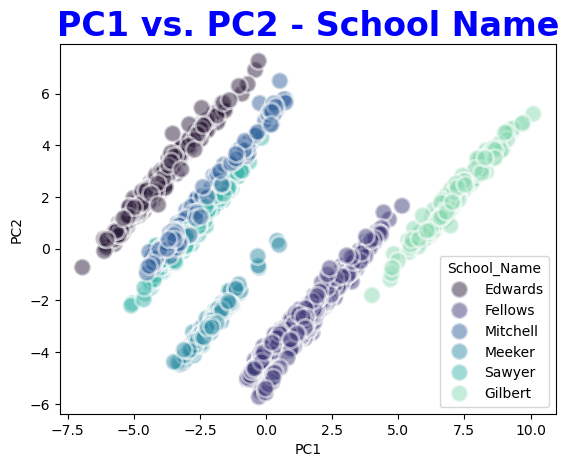

In [29]:
plt.title('PC1 vs. PC2 - School Name', fontweight='bold', color = 'blue', fontsize='24', horizontalalignment='center')
sns.scatterplot(x='PC1', y='PC2', data=df_re_results, hue='School_Name', 
                alpha=0.5, s=150, edgecolor='white', linewidth=2, palette='mako')
plt.xlabel("PC1")
plt.ylabel("PC2")


Text(0, 0.5, 'PC2')

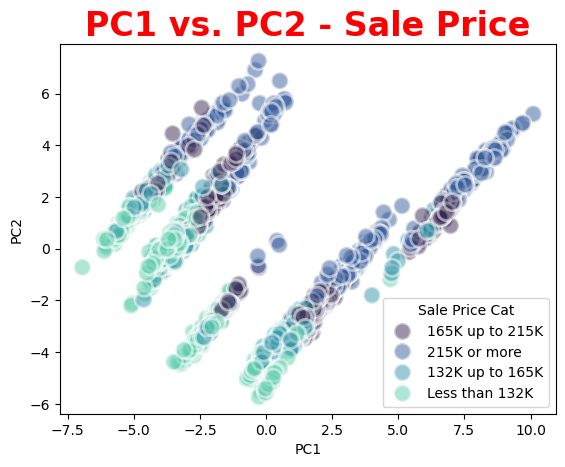

In [30]:
plt.title('PC1 vs. PC2 - Sale Price', fontweight='bold', color = 'red', fontsize='24', horizontalalignment='center')
sns.scatterplot(x='PC1', y='PC2', data=df_re_results, hue='Sale Price Cat', 
                alpha=0.5, s=150, edgecolor='white', linewidth=2, palette='mako')
plt.xlabel("PC1")
plt.ylabel("PC2")


In [31]:
# in this section I visualized the PCA results, I visualized it for Sale Price Category and the School_Name 

### Section 6c: Explain the Visualize PCA Results

#####  In the first scatterplot, each school forms a distinct cluster, with one exception: **Sawyer** and **Mitchell** show some overlap, suggesting they share common characteristics. Aside from these two schools, the remaining clusters are well-separated, indicating that different features likely distinguish them. The shared characteristics causing overlap might include factors such as similar student demographics, while the distinct features of other clusters could stem from unique demographic or academic attributes specific to each school.

##### In the second scatterplot it looks like the sale price seems to follow a trend where higher the Sale Price, the more positive the PC1 and PC2. The clusters have the same shape as each other as well as the hue is the only thing that has changed.

In [35]:
# In this section I went ahead and explained the PCA Results

## 7. PCA with df_re_sc_only and visualize

### Section 7a: Create a Principal Component Analysis for df_re_sc

In [38]:
from sklearn.decomposition import PCA

n_pcs = 60
model = PCA(n_components=n_pcs)

df_re_only_pca = model.fit_transform(df_re_only_sc)

#Create a DataFrame of the projected data
df_re_only_pca = pd.DataFrame(df_re_only_pca)

names = []
for x in range(n_pcs):
    names.append('PC%d'%(x+1))

df_re_only_pca.columns = names

df_re_only_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,2.724173,0.129998,-1.909417,-1.438997,0.917081,-0.806303,-0.631188,-2.441285,0.858684,-0.830311,0.782351,-0.409554,-0.317877,-0.433982,-1.226439,0.098338,-0.582106,0.650290,0.437476,0.180281,-0.116235,0.640317,-0.538527,-0.102475,-0.781485,-0.271161,0.824921,-0.245390,-0.567997,0.233409,0.114359,-0.357377,0.708905,-0.665507,0.153574,-0.129933,-0.418487,-0.214970,0.452039,0.142069,0.312421,-0.189292,-0.436167,0.266655,-0.359575,0.126615,0.346682,0.565761,-0.086481,-0.128698,0.567222,-0.249951,0.087797,0.247261,-0.122329,-0.122621,0.392036,-0.005043,0.001173,-0.149251
1,2.824857,0.002586,-1.764400,-1.105110,0.514970,-0.966579,-0.471320,-2.068741,0.777930,-0.615655,1.010722,-0.560244,-0.272928,-0.509270,-1.088608,0.079804,-0.508385,0.475060,0.480451,0.194869,-0.014071,0.704725,-0.712459,-0.208057,-0.553397,-0.084113,0.850607,-0.054161,-0.583054,0.298134,0.308148,-0.052852,0.594233,-0.566230,-0.088360,0.018332,-0.284346,-0.139673,0.270449,-0.244282,0.177589,-0.604283,-0.601591,0.193206,-0.461056,0.111904,0.094848,0.388578,-0.344504,0.044720,0.358125,-0.267279,-0.777196,0.070177,-0.758746,-0.144775,0.056407,0.014067,0.395010,0.181550
2,2.599694,-1.153449,-0.285252,3.495988,1.099921,-1.771342,-1.262630,0.181605,0.815980,-0.350445,1.155073,-0.660579,0.216560,0.454580,-0.404501,0.168563,-0.056384,0.541061,0.098507,0.069515,0.476077,0.508291,-0.530761,-0.060865,-0.394432,-0.254564,0.778416,0.024756,-0.273646,0.253878,0.161716,0.312386,0.257774,0.187614,0.435609,-0.113459,0.176992,-0.390520,-0.207835,-0.949517,-0.229579,0.454691,-0.652401,-0.109393,-0.660443,-0.145040,-1.142776,0.776761,1.073500,-0.333011,-0.707579,0.661372,-0.461612,0.601979,-0.755819,-1.024514,0.054089,-0.258772,-0.457832,-0.082235
3,2.206576,-0.663278,0.168330,2.811029,0.744310,-1.790578,-1.638615,0.030401,0.570798,0.841578,1.300762,-0.972450,0.202308,-0.323111,-0.879400,0.153573,-0.432384,0.641112,-0.105220,-0.279792,0.440341,0.406743,-0.868887,0.529214,-0.022135,-0.704865,0.694426,0.387996,-0.017009,-0.062269,0.218780,0.310033,0.523863,0.680273,0.331570,0.416226,0.198664,0.258670,-0.896165,-0.581877,-0.623341,-0.272787,-0.506700,-0.582556,-0.391194,-0.988482,-0.168873,-0.071888,-0.367493,0.517051,-0.005601,-0.198684,-0.017465,-0.129123,-0.671631,-0.495050,0.325984,0.129248,0.505462,-0.093216
4,0.641259,-1.257938,-0.816172,2.127561,1.360106,-1.830359,-0.888927,-0.858182,0.692652,-0.136676,1.510142,-1.102164,0.280838,0.110016,-1.022313,0.385970,-0.618251,0.601816,0.215950,-0.219413,0.096646,0.568716,-0.810857,0.234877,-0.159430,-0.727506,0.919127,0.263068,-0.149811,-0.131797,-0.008561,-0.047604,0.535747,0.326783,0.312373,0.023119,0.084005,0.024891,-0.123552,-0.479948,-0.106851,0.015172,0.023401,-0.341820,-0.003307,0.269668,0.568424,0.116791,-0.403483,0.288965,0.393796,-0.049622,-0.202880,-0.483548,-0.028011,0.284788,0.063434,-0.156369,0.009898,-0.324176


In [39]:
explained_ratio = model.explained_variance_ratio_
explained_ratio = pd.DataFrame(explained_ratio).reset_index()
explained_ratio = explained_ratio.rename(columns = {0: 'explained_ratio', 'index': 'PC'})
explained_ratio['explained_ratio_sum']= np.cumsum(explained_ratio.explained_ratio)
explained_ratio

,PC,explained_ratio,explained_ratio_sum
0,0,0.115822,0.115822
1,1,0.055618,0.171440
2,2,0.038214,0.209655
3,3,0.033123,0.242778
4,4,0.030787,0.273564
5,5,0.025919,0.299483
6,6,0.023753,0.323236
7,7,0.022182,0.345418
8,8,0.021149,0.366568
9,9,0.020316,0.386884


In [40]:
# in this section I created a PCA for df_re_only_sc, using 60 of the features instead of the full 102, created a dataframe explaining the ratio

### Section 7b: Visualize PCA Results for df_re_sc

In [42]:
df_re_only_results = pd.concat([df_realestate,df_re_only_pca])

Text(0, 0.5, 'PC2')

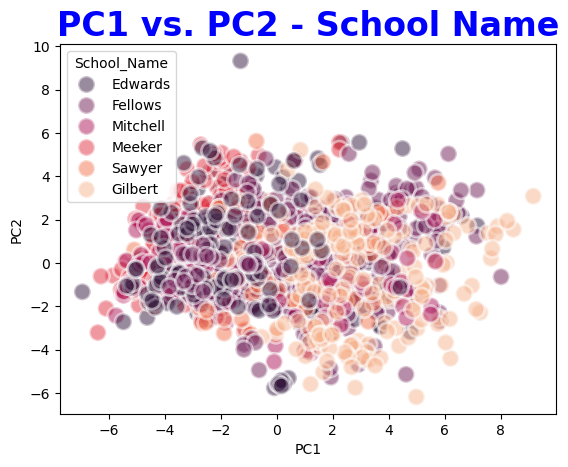

In [43]:
plt.title('PC1 vs. PC2 - School Name', fontweight='bold', color = 'blue', fontsize='24', horizontalalignment='center')
sns.scatterplot(x='PC1', y='PC2', data=df_re_only_results, hue='School_Name', 
                alpha=0.5, s=150, edgecolor='white', linewidth=2, palette='rocket')
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

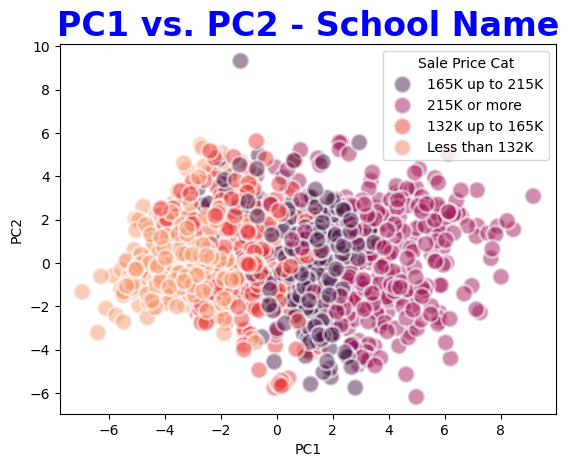

In [44]:
plt.title('PC1 vs. PC2 - School Name', fontweight='bold', color = 'blue', fontsize='24', horizontalalignment='center')
sns.scatterplot(x='PC1', y='PC2', data=df_re_only_results, hue='Sale Price Cat', 
                alpha=0.5, s=150, edgecolor='white', linewidth=2, palette='rocket')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [45]:
# in this section I visualized the PCA results, I visualized it for Sale Price Category and the School_Name 

### Section 7c: Explain the Visualize PCA Results for df_re_only_sc

##### In contrast to the initial scatterplots, where the groups were clearly delineated with noticeable space between them, these two scatterplots illustrate a significant trend: the plot points have converged. This convergence is particularly evident in how the various Sale Price categories and School names are represented. In both scatterplots, we observe that the colors have coalesced, suggesting a shared relationship among the data points that was not present in the earlier visualizations. This shift in pattern may indicate a closer correlation between the variables being analyzed."

In [48]:
# Exaplaining the visualized PCA Results

## 8. Create a cluster analysis to compare df_re_only_sc and df_re_only_pca

### Section 8a: Create a Cluster Analysis for df_re_only_sc

In [51]:
from sklearn.cluster import KMeans

df_re_only_sc_Kmeans_4 = KMeans(n_clusters=4)
df_re_only_sc_Kmeans_4.fit(df_re_only_sc)
df_re_only_sc_Kmeans_4 = df_re_only_sc_Kmeans_4.predict(df_re_only_sc)
df_re_only_sc_Kmeans_4 = pd.DataFrame(df_re_only_sc_Kmeans_4)
df_re_only_sc_Kmeans_4 = df_re_only_sc_Kmeans_4.rename(columns = {0:'Predict_k_means'})

display(df_re_only_sc_Kmeans_4.head())
df_re_only_sc_Kmeans_4['Predict_k_means'].value_counts()

,Predict_k_means
0,3
1,3
2,0
3,0
4,0


Predict_k_means
1    630
0    374
3    322
2     61
Name: count, dtype: int64

In [52]:
#in this section I created a K means cluster for df_re_only_sc with 4 a prediction of 4 clusters

In [53]:
### Section 8b: Create a Cluster Analysis for df_re_only_pca

In [97]:
df_re_only_pca_cluster =df_re_only_pca.iloc[:, 0:32]

In [99]:
df_re_only_pca_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,2.724173,0.129998,-1.909417,-1.438997,0.917081,-0.806303,-0.631188,-2.441285,0.858684,-0.830311,0.782351,-0.409554,-0.317877,-0.433982,-1.226439,0.098338,-0.582106,0.650290,0.437476,0.180281,-0.116235,0.640317,-0.538527,-0.102475,-0.781485,-0.271161,0.824921,-0.245390,-0.567997,0.233409,0.114359,-0.357377
1,2.824857,0.002586,-1.764400,-1.105110,0.514970,-0.966579,-0.471320,-2.068741,0.777930,-0.615655,1.010722,-0.560244,-0.272928,-0.509270,-1.088608,0.079804,-0.508385,0.475060,0.480451,0.194869,-0.014071,0.704725,-0.712459,-0.208057,-0.553397,-0.084113,0.850607,-0.054161,-0.583054,0.298134,0.308148,-0.052852
2,2.599694,-1.153449,-0.285252,3.495988,1.099921,-1.771342,-1.262630,0.181605,0.815980,-0.350445,1.155073,-0.660579,0.216560,0.454580,-0.404501,0.168563,-0.056384,0.541061,0.098507,0.069515,0.476077,0.508291,-0.530761,-0.060865,-0.394432,-0.254564,0.778416,0.024756,-0.273646,0.253878,0.161716,0.312386
3,2.206576,-0.663278,0.168330,2.811029,0.744310,-1.790578,-1.638615,0.030401,0.570798,0.841578,1.300762,-0.972450,0.202308,-0.323111,-0.879400,0.153573,-0.432384,0.641112,-0.105220,-0.279792,0.440341,0.406743,-0.868887,0.529214,-0.022135,-0.704865,0.694426,0.387996,-0.017009,-0.062269,0.218780,0.310033
4,0.641259,-1.257938,-0.816172,2.127561,1.360106,-1.830359,-0.888927,-0.858182,0.692652,-0.136676,1.510142,-1.102164,0.280838,0.110016,-1.022313,0.385970,-0.618251,0.601816,0.215950,-0.219413,0.096646,0.568716,-0.810857,0.234877,-0.159430,-0.727506,0.919127,0.263068,-0.149811,-0.131797,-0.008561,-0.047604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.605668,4.722682,0.509430,-0.768272,-0.816407,1.259796,-1.056580,-3.120994,0.442446,1.549227,3.698117,1.663777,2.163857,2.066426,-1.179800,-1.349171,1.303789,-0.854146,-0.159140,1.026338,-1.362521,-1.309028,1.407494,0.409845,0.309789,-0.717133,-0.630115,1.419009,0.284930,-0.118749,1.239438,-1.600340
1383,-5.033872,-0.284487,0.688667,1.018641,-1.192354,0.720018,0.459038,-1.426110,1.048948,1.102243,1.496981,4.268577,3.426395,-0.010892,-0.094688,-0.263932,-0.439136,2.346173,-1.242367,2.222455,-0.528734,0.621777,0.408854,-0.501405,0.705549,0.183312,-0.461236,2.289667,-0.742038,-0.359420,0.265800,2.510264
1384,-1.501109,2.186293,0.639954,0.303375,-1.460876,1.179313,-0.289013,-1.076168,0.872370,1.679013,0.874157,2.140682,2.412431,1.885362,-1.963259,-0.228195,-1.323044,-1.320133,0.016955,1.404422,-0.877324,0.898916,0.839538,-0.332632,0.155645,-0.201486,-0.322186,0.506373,-0.008830,-0.234189,-0.040379,0.540843
1385,0.497914,-0.170043,-4.112183,-3.465653,-0.462082,5.169069,0.568743,1.671473,-0.309401,-0.296980,-0.955912,-0.456970,3.088115,0.948687,1.138007,-0.509574,-0.011019,1.085408,4.143371,-0.488403,4.117816,-0.068001,0.793290,3.498800,5.816752,-0.552201,15.633298,1.230246,15.999504,0.406597,6.621194,0.758073


In [103]:
df_re_only_sc_pca_Kmeans_4 = KMeans(n_clusters=4)
df_re_only_sc_pca_Kmeans_4.fit(df_re_only_pca_cluster)
df_re_only_sc_pca_Kmeans_4 = df_re_only_sc_pca_Kmeans_4.predict(df_re_only_pca_cluster)
df_re_only_sc_pca_Kmeans_4 = pd.DataFrame(df_re_only_sc_pca_Kmeans_4)
df_re_only_sc_pca_Kmeans_4 = df_re_only_sc_pca_Kmeans_4.rename(columns = {0:'Predict_k_means_PCA'})

display(df_re_only_sc_pca_Kmeans_4.head())
df_re_only_sc_pca_Kmeans_4['Predict_k_means_PCA'].value_counts()

,Predict_k_means_PCA
0,2
1,2
2,2
3,2
4,2


Predict_k_means_PCA
2    558
3    457
0    241
1    131
Name: count, dtype: int64

In [ ]:
# Created cluster analysis for the pca datframe

In [55]:
### Section 8c: Compare and Explain Results for Clusters

In [111]:
df_cluster_compare = pd.crosstab(df_re_only_sc_Kmeans_4['Predict_k_means'],
df_re_only_sc_pca_Kmeans_4['Predict_k_means_PCA'])

In [113]:
df_cluster_compare

Predict_k_means_PCA,0,1,2,3
Predict_k_means,,,,
0,0,1,272,101
1,239,55,1,335
2,2,56,0,3
3,0,19,285,18


<Axes: xlabel='Predict_k_means_PCA'>

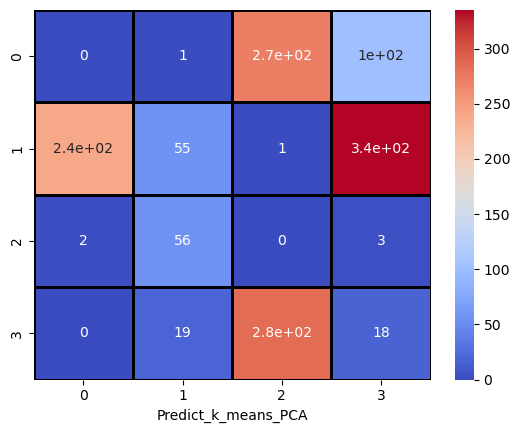

In [109]:
df_cluster_heatmap = df_cluster_compare.iloc[:, 1:5]
sns.heatmap(df_cluster_heatmap, cmap='coolwarm', linecolor='black', linewidth=1, annot=True)

### Upon reviewing the crosstab, it appears that the strongest similarities exist between predict_k_means cluster 1 and all clusters (0, 1, and 3) of Predict_K_means_PCA. Conversely, Predict_K_means_PCA demonstrates the most similarities for cluster 2 with predict_k_means clusters 0 and 4. Although only two combinations of clusters in the crosstab are represented by a value of 0, there are notable similarities among the clusters. They exhibit significant overlap in certain areas while also displaying distinct differences in others.